In [40]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
dataset = pd.read_csv('UCI_Heart_Disease_Dataset_Combined.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [42]:
X, y

(array([[ 40. ,   1. ,   1. , ..., 172. ,   0. ,   0. ],
        [ 49. ,   0. ,   2. , ..., 156. ,   0. ,   1. ],
        [ 37. ,   1. ,   1. , ...,  98. ,   0. ,   0. ],
        ...,
        [ 47. ,   1. ,   0. , ..., 118. ,   1. ,   1. ],
        [ 50. ,   0. ,   0. , ..., 159. ,   0. ,   0. ],
        [ 54. ,   1. ,   0. , ..., 113. ,   0. ,   1.4]]),
 array([0, 1, 0, ..., 0, 1, 0], dtype=int64))

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(classifier, X, y, cv):
    # Assuming X_train and y_train are your training data and labels
    train_sizes, train_scores, valid_scores = learning_curve(
        classifier, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv
    )

    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    # Print final scores
    print("Final Training Scores:", train_scores_mean[-1])
    print("Final Cross-validation Scores:", valid_scores_mean[-1])

    # Plot learning curve
    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

In [44]:
import seaborn as sns
def plot_seaborn_cm(cm, title):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(title, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def print_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test,y_pred))
    print("Recall:", recall_score(y_test,y_pred))
    print("F1 Score:", f1_score(y_test,y_pred))
    return cm

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [47]:
temp_df = pd.DataFrame(X)
temp_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,40.0,1.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0
1,0.0,0.0,1.0,0.0,49.0,0.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0
2,0.0,1.0,0.0,0.0,37.0,1.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0
3,0.0,0.0,0.0,1.0,48.0,0.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5
4,0.0,0.0,1.0,0.0,54.0,1.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,0.0,1.0,0.0,0.0,59.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0
2939,1.0,0.0,0.0,0.0,60.0,1.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8
2940,1.0,0.0,0.0,0.0,47.0,1.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0
2941,1.0,0.0,0.0,0.0,50.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
X_train

array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 1.43e+02, 1.00e+00, 1.20e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.47e+02, 0.00e+00, 1.00e-01],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 8.00e+01, 1.00e+00, 0.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.60e+02, 0.00e+00, 2.40e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.33e+02, 0.00e+00, 1.60e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.44e+02, 1.00e+00, 1.40e+00]])

In [50]:
# Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
X_train

array([[-0.69923605, -0.49082247,  1.63124622, ..., -0.04381998,
         1.19763642, -0.22973874],
       [ 1.43013221, -0.49082247, -0.61302824, ...,  0.09762976,
        -0.83497795, -0.92689739],
       [-0.69923605, -0.49082247,  1.63124622, ..., -2.27165335,
         1.19763642, -0.99027545],
       ...,
       [-0.69923605,  2.03739655, -0.61302824, ...,  0.55734141,
        -0.83497795,  0.53079798],
       [-0.69923605,  2.03739655, -0.61302824, ..., -0.39744432,
        -0.83497795,  0.0237735 ],
       [-0.69923605, -0.49082247, -0.61302824, ..., -0.00845754,
         1.19763642, -0.10298262]])

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Confusion Matrix: [[165  98]
 [ 59 267]]
Accuracy Score: 0.733446519524618


In [54]:
# dataset is slightly skewed, so let's look at precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision: 0.7315068493150685
Recall: 0.8190184049079755
F1 Score: 0.7727930535455863


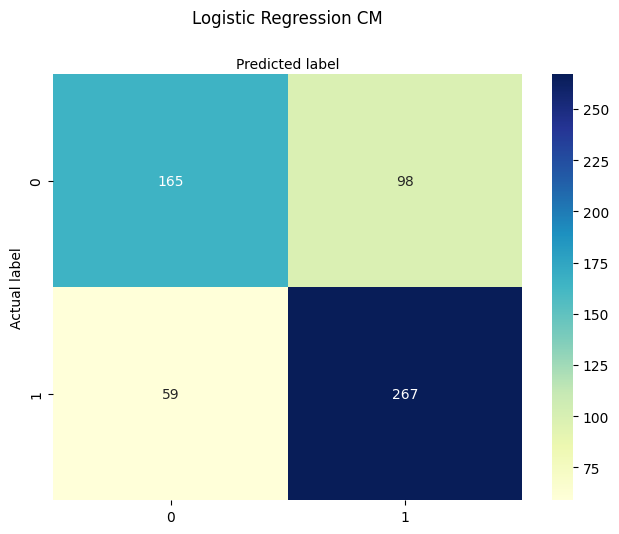

In [55]:
plot_seaborn_cm(cm, "Logistic Regression CM")

c:\Users\sajid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sajid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

c:\Users\sajid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sajid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Final Training Scores: 0.7411214953271028
Final Cross-validation Scores: 0.6802380374900384


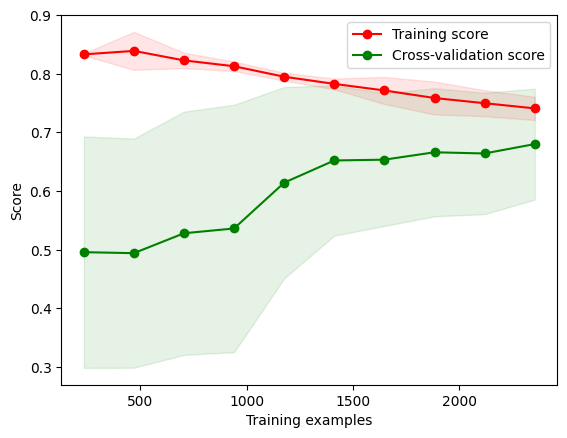

In [56]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=5)

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
cm = print_metrics(y_test=y_test, y_pred=y_pred)

[[210  53]
 [ 49 277]]
Accuracy: 0.8268251273344652
Precision: 0.8393939393939394
Recall: 0.8496932515337423
F1 Score: 0.8445121951219512


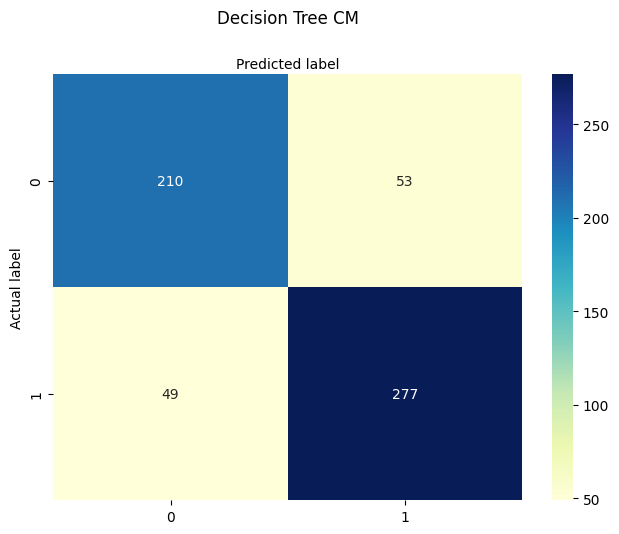

In [60]:
plot_seaborn_cm(cm, "Decision Tree CM")

Final Training Scores: 1.0
Final Cross-validation Scores: 0.762567709596572


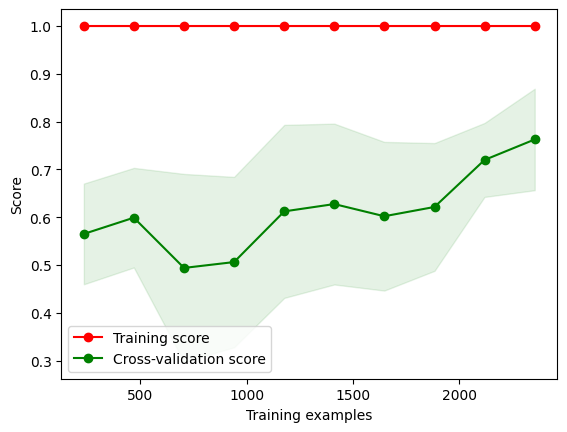

In [61]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=5)

Final Training Scores: 1.0
Final Cross-validation Scores: 0.8241750259425805


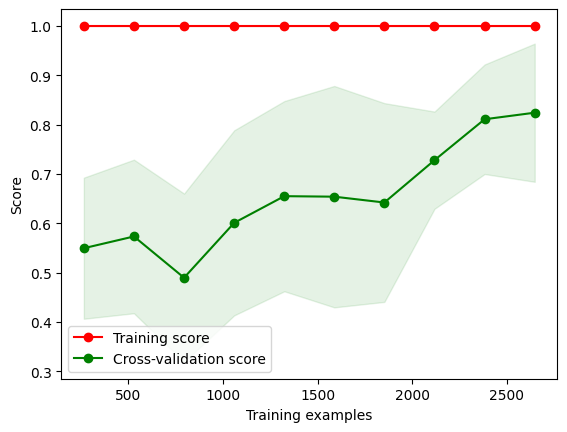

In [62]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=10)

In [63]:
# # Looking for good decision tree hyperparamters
# from sklearn.model_selection import GridSearchCV

# # Define hyperparameter grid
# parameters = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': [18, 19, 20, 21, 22, 23],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 4, 8, 12]
# }

# grid_search = GridSearchCV(estimator=classifier, 
#                            param_grid=parameters, 
#                            scoring='accuracy', 
#                            cv=10, 
#                            n_jobs=-1)

# # apply grid search only on the training set
# # fit parameters: Matrix of features X, independent variable vector y
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# # print our results
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

In [64]:
# testing out with new parameters
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
cm = print_metrics(y_test=y_test, y_pred=y_pred)

[[210  53]
 [ 47 279]]
Accuracy: 0.830220713073005
Precision: 0.8403614457831325
Recall: 0.8558282208588958
F1 Score: 0.8480243161094226


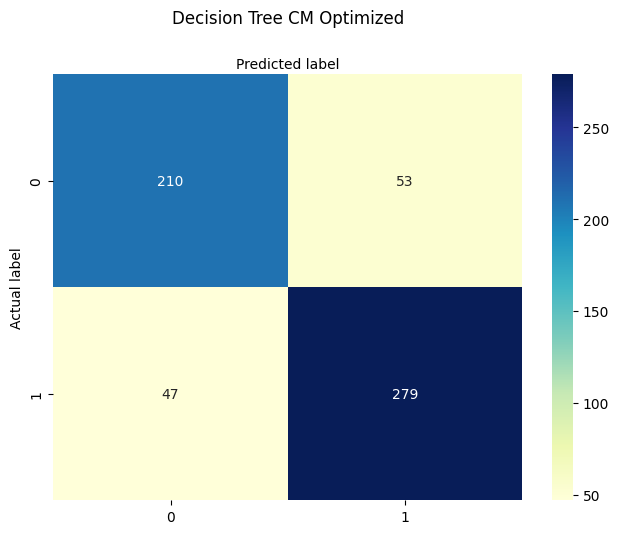

In [67]:
plot_seaborn_cm(cm, "Decision Tree CM Optimized")

Final Training Scores: 0.9981308411214954
Final Cross-validation Scores: 0.7632404744580346


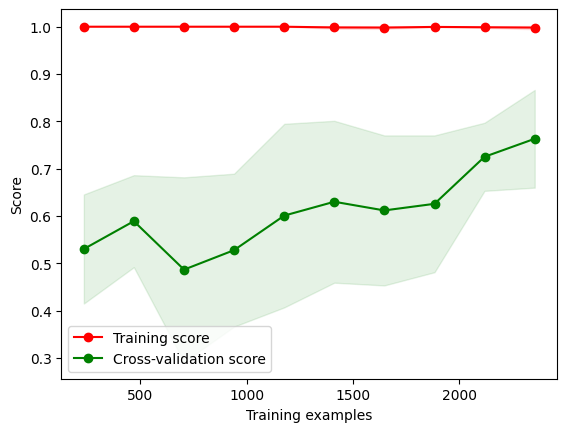

In [68]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=5)

Final Training Scores: 0.9990936555891239
Final Cross-validation Scores: 0.8241750259425805


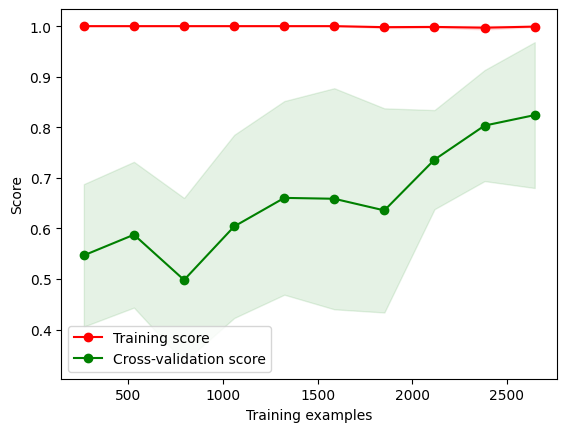

In [69]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=10)

In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
cm = print_metrics(y_test=y_test, y_pred=y_pred)

[[208  55]
 [ 22 304]]
Accuracy: 0.8692699490662139
Precision: 0.8467966573816156
Recall: 0.9325153374233128
F1 Score: 0.8875912408759123


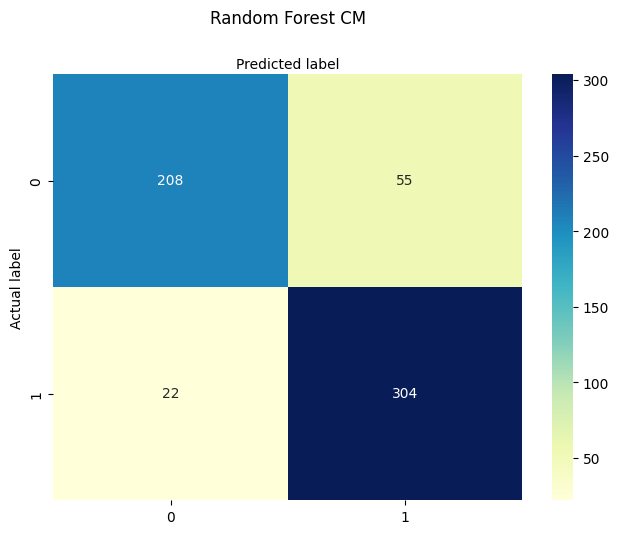

In [73]:
plot_seaborn_cm(cm, "Random Forest CM")

In [74]:
# # Looking for good decision tree hyperparamters
# from sklearn.model_selection import GridSearchCV

# # Define hyperparameter grid
# parameters = {
#     'n_estimators': [100],
#     'criterion': ['gini'],
#     'max_depth': [21],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1]
# }

# grid_search = GridSearchCV(estimator=classifier, 
#                            param_grid=parameters, 
#                            scoring='accuracy', 
#                            cv=10, 
#                            n_jobs=-1)

# # apply grid search only on the training set
# # fit parameters: Matrix of features X, independent variable vector y
# grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_

# # print our results
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

In [90]:
# with better parameters
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=21, min_samples_leaf=1, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=21, random_state=42)

In [91]:
y_pred = classifier.predict(X_test)

In [92]:
cm = print_metrics(y_test=y_test, y_pred=y_pred)

[[209  54]
 [ 15 311]]
Accuracy: 0.8828522920203735
Precision: 0.852054794520548
Recall: 0.9539877300613497
F1 Score: 0.9001447178002896


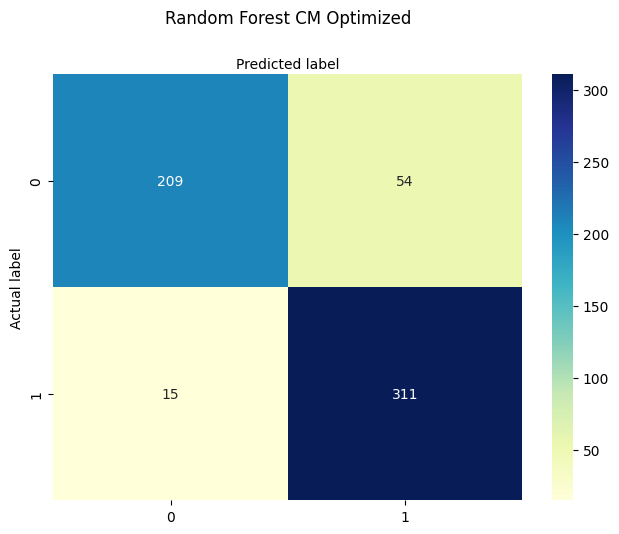

In [93]:
plot_seaborn_cm(cm, "Random Forest CM Optimized")

Final Training Scores: 1.0
Final Cross-validation Scores: 0.8223496529341787


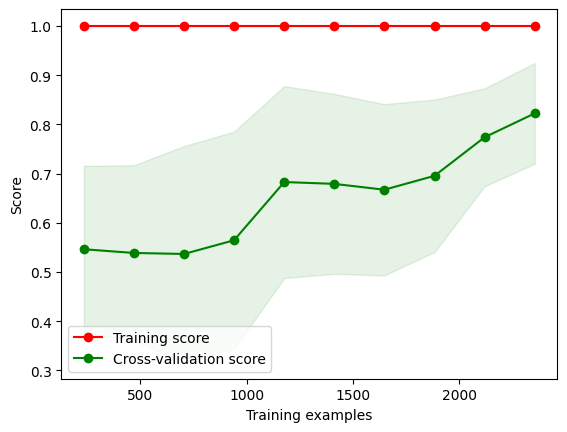

In [94]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=5)

Final Training Scores: 1.0
Final Cross-validation Scores: 0.8703701141473539


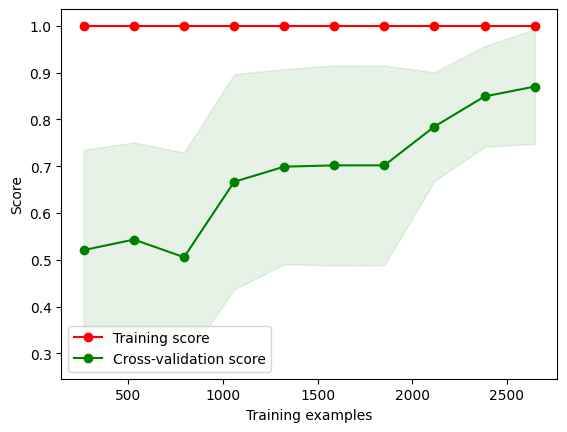

In [95]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=10)

Try out SVM Classification

In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf", random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
cm = print_metrics(y_test=y_test, y_pred=y_pred)

[[181  82]
 [ 48 278]]
Accuracy: 0.7792869269949066
Precision: 0.7722222222222223
Recall: 0.852760736196319
F1 Score: 0.8104956268221575


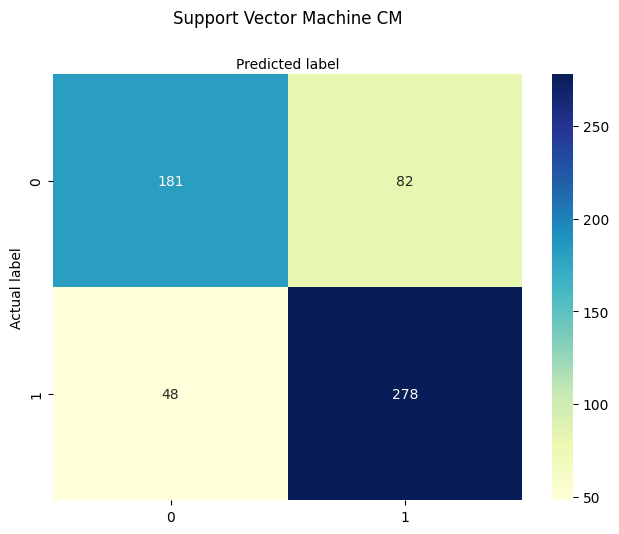

In [87]:
plot_seaborn_cm(cm, "Support Vector Machine CM")

Final Training Scores: 0.6464740866610026
Final Cross-validation Scores: 0.5589307369807006


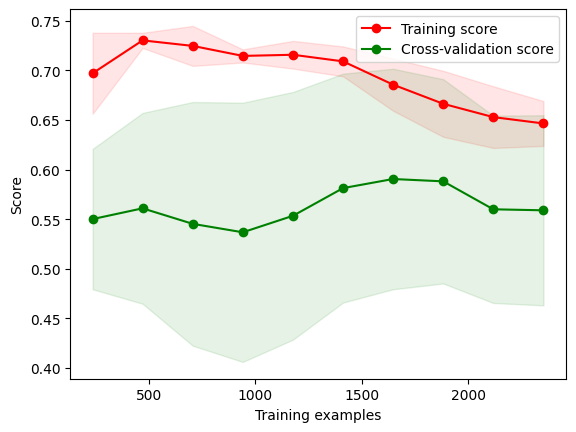

In [88]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=5)

Try XGBoost now

In [100]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
y_pred = classifier.predict(X_test)

In [102]:
cm = print_metrics(y_test=y_test, y_pred=y_pred)

[[213  50]
 [ 19 307]]
Accuracy: 0.8828522920203735
Precision: 0.8599439775910365
Recall: 0.941717791411043
F1 Score: 0.8989751098096632


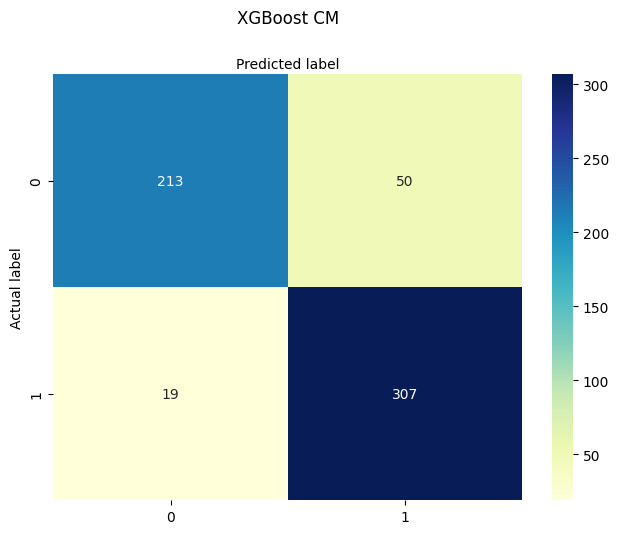

In [103]:
plot_seaborn_cm(cm, "XGBoost CM")

Final Training Scores: 0.9966864910790145
Final Cross-validation Scores: 0.8039984754513011


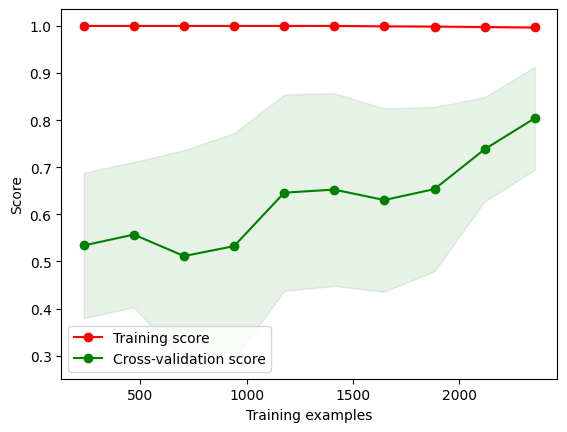

In [104]:
plot_learning_curve(classifier=classifier, X=X, y=y, cv=5)